In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
df = pd.read_csv("song_artist.csv")
df.head()

,id,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0,death bed (coffee for your head) (feat. beabad...,Powfu,0.7310,0.726,0.431,0.00000,0.696,0.1350,0.393250,0.809500,0.408750,0.000062,0.234088,0.131225
1,1,THE SCOTTS,THE SCOTTS,0.2330,0.716,0.537,0.00000,0.157,0.0514,0.307500,0.706500,0.521000,0.000000,0.159000,0.052050
2,2,The Box,Roddy Ricch,0.1040,0.896,0.586,0.00000,0.790,0.0559,0.184209,0.784984,0.627953,0.000013,0.167566,0.229681
3,3,ily (i love you baby) (feat. Emilee),Surf Mesa,0.0686,0.674,0.774,0.00188,0.393,0.0892,0.043200,0.680667,0.709333,0.000627,0.193000,0.058133
4,4,Supalonely,BENEE,0.3050,0.863,0.631,0.00003,0.123,0.0534,0.345733,0.757444,0.574333,0.000010,0.145644,0.041956


In [3]:
song_id = df[["id", "name", "artists"]]

In [4]:
data = df.drop(["id", "name", "artists", "acousticness", "danceability"], axis = 1).copy()

In [5]:
data.head()

,energy,instrumentalness,liveness,speechiness,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0.431,0.00000,0.696,0.1350,0.393250,0.809500,0.408750,0.000062,0.234088,0.131225
1,0.537,0.00000,0.157,0.0514,0.307500,0.706500,0.521000,0.000000,0.159000,0.052050
2,0.586,0.00000,0.790,0.0559,0.184209,0.784984,0.627953,0.000013,0.167566,0.229681
3,0.774,0.00188,0.393,0.0892,0.043200,0.680667,0.709333,0.000627,0.193000,0.058133
4,0.631,0.00003,0.123,0.0534,0.345733,0.757444,0.574333,0.000010,0.145644,0.041956


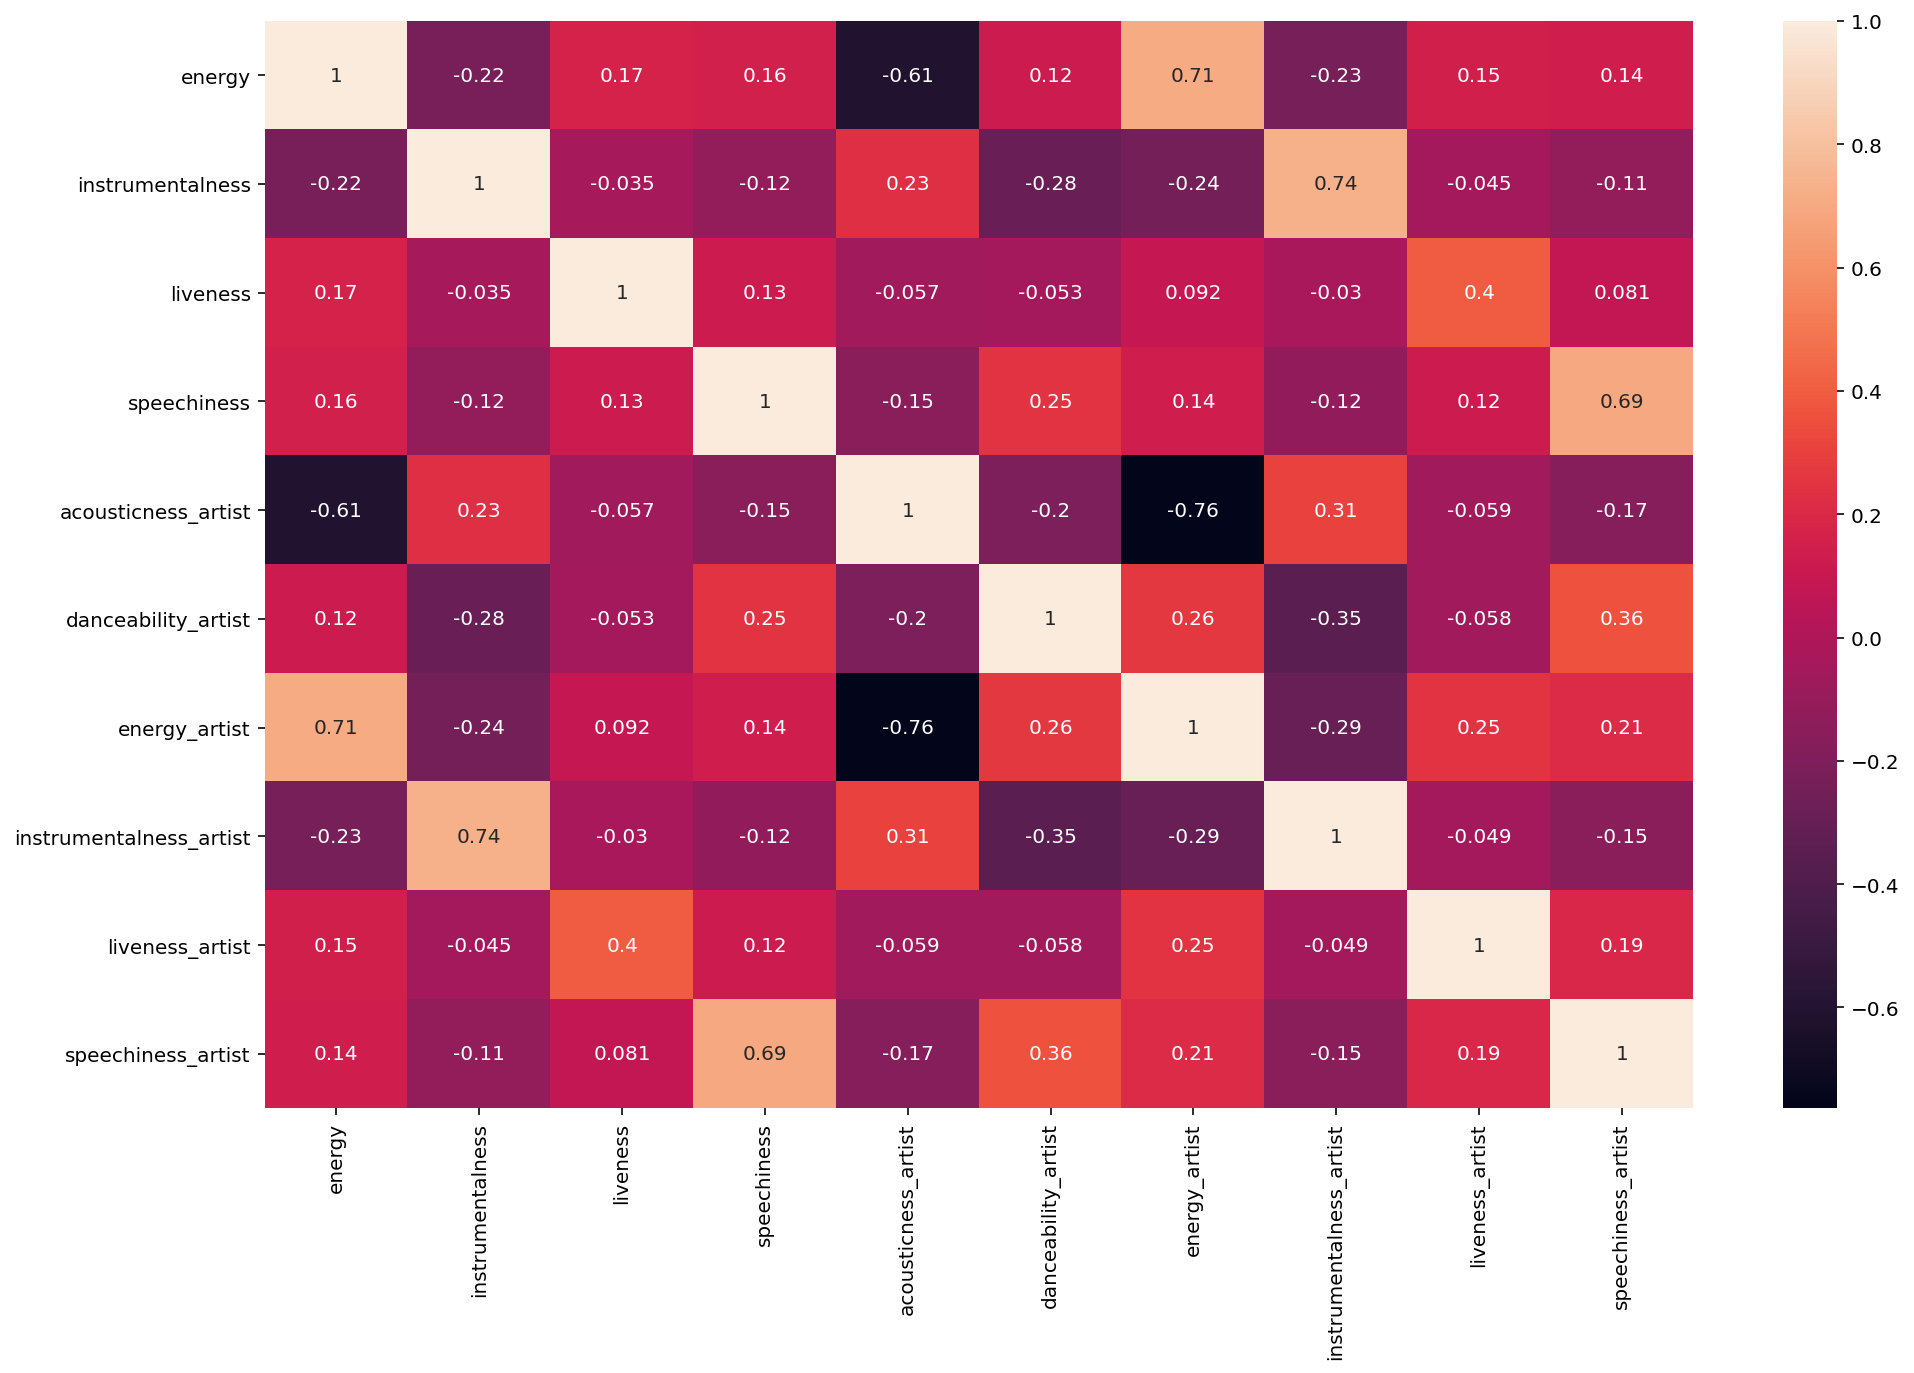

In [6]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)

In [7]:
data.head()

,energy,instrumentalness,liveness,speechiness,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0.431,0.00000,0.696,0.1350,0.393250,0.809500,0.408750,0.000062,0.234088,0.131225
1,0.537,0.00000,0.157,0.0514,0.307500,0.706500,0.521000,0.000000,0.159000,0.052050
2,0.586,0.00000,0.790,0.0559,0.184209,0.784984,0.627953,0.000013,0.167566,0.229681
3,0.774,0.00188,0.393,0.0892,0.043200,0.680667,0.709333,0.000627,0.193000,0.058133
4,0.631,0.00003,0.123,0.0534,0.345733,0.757444,0.574333,0.000010,0.145644,0.041956


In [8]:
meta = data.values
meta.shape

(87009, 10)

In [9]:
meta = meta[:40000, :]
meta.shape

(40000, 10)

In [10]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=8)
# meta = pca.fit_transform(meta)
# meta.shape

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(meta, meta)

In [12]:
song_id["search"] = song_id["name"] + ' ' + song_id["artists"]

<ipython-input-12-1167fd3abdfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_id["search"] = song_id["name"] + ' ' + song_id["artists"]


In [13]:
def get_recommendations(idx, cosine_sim=cosine_sim):
    
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]
    sim_scores.sort()
    # Get the song indices
    song_index = [i[0] for i in sim_scores]
    song_index = song_index
    # Return the top 10 most similar songs
    return song_index

In [14]:
song_id.head()

,id,name,artists,search
0,0,death bed (coffee for your head) (feat. beabad...,Powfu,death bed (coffee for your head) (feat. beabad...
1,1,THE SCOTTS,THE SCOTTS,THE SCOTTS THE SCOTTS
2,2,The Box,Roddy Ricch,The Box Roddy Ricch
3,3,ily (i love you baby) (feat. Emilee),Surf Mesa,ily (i love you baby) (feat. Emilee) Surf Mesa
4,4,Supalonely,BENEE,Supalonely BENEE


In [17]:
mask = song_id["search"].str.contains("vertigo", case=False, regex=False)
song_id[mask]

,id,name,artists,search
9588,9588,Vertigo,Khalid,Vertigo Khalid
29028,29028,Vertigo,U2,Vertigo U2
46853,46853,Retrovertigo,Mr. Bungle,Retrovertigo Mr. Bungle
49548,49548,Vertigo/Relight My Fire,Dan Hartman,Vertigo/Relight My Fire Dan Hartman


In [19]:
identifier = 9588

recoms = get_recommendations(identifier)
#recoms.sort(reverse=True)
print(recoms)

print("Song recommendations for: " + song_id.iloc[identifier, song_id.columns.get_loc("name")]+" by " + song_id.iloc[identifier, song_id.columns.get_loc("artists")])
for i in recoms:
    print(song_id.iloc[i, song_id.columns.get_loc("name")] + " by " +\
         song_id.iloc[i, song_id.columns.get_loc("artists")])
    print("\n")

[687, 1542, 4967, 8651, 9878, 9962, 10425, 10785, 12010, 35445]
Song recommendations for: Vertigo by Khalid
Feelings by Lauv


Free Spirit by Khalid


Shot Down by Khalid


Twenty One by Khalid


Foolsong by Still Woozy


The Louvre by Lorde


Supercut by Lorde


Wolfcat by Still Woozy


Cold Blooded by Khalid


A Couple Of Forevers by Chrisette Michele




In [20]:
np.save("sim.npy", cosine_sim)

In [ ]:
#song_id.to_csv("id.csv", index=False)